# Lending Club Data Cleaning in Python 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt 

In [4]:
if __name__ == '__main__':
    # Override default pandas configuration
    pd.options.display.width = 0
    pd.options.display.max_rows = 10000
    pd.options.display.max_info_columns = 10000

In [5]:
# importing the data
df = pd.read_csv("Desktop/ACC 652/Week 4/LoanStats3C.csv")

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,21425.0,21425.0,21425.0,60 months,15.59%,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
235628,NaN,NaN,10000.0,10000.0,9975.0,36 months,19.20%,367.58,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235631,Total amount funded in policy code 1: 3503840175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235632,Total amount funded in policy code 2: 873652739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q1: What do you expect will be major data quality issues with LendingClub's data?

#### 1. Missing values: remove all of the columns 

* removing all rows with missing values removes the entire dataset: 39% of data is missing value

In [8]:
df.info()
# 235633 entries, 145 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235633 entries, 0 to 235632
Data columns (total 145 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   id                                          2 non-null       object 
 1   member_id                                   0 non-null       float64
 2   loan_amnt                                   235629 non-null  float64
 3   funded_amnt                                 235629 non-null  float64
 4   funded_amnt_inv                             235629 non-null  float64
 5   term                                        235629 non-null  object 
 6   int_rate                                    235629 non-null  object 
 7   installment                                 235629 non-null  float64
 8   grade                                       235629 non-null  object 
 9   sub_grade                                   235629 non-null  object 


In [9]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,235629.000000,235629.000000,235629.000000,235629.000000,2.356290e+05,0.0,235629.000000,235629.000000,235629.000000,...,392.0,392.000000,392.0,392.000000,317.000000,392.000000,392.000000,3498.000000,3498.000000,3498.000000
mean,NaN,14870.156793,14870.156793,14865.334169,442.458910,7.485415e+04,NaN,18.040770,0.344512,0.755760,...,3.0,127.623163,3.0,14.211735,380.107950,8758.849439,202.399388,4670.258385,47.066021,8.433391
std,NaN,8438.318193,8438.318193,8435.524995,245.043722,5.554753e+04,NaN,8.023002,0.898319,1.033981,...,0.0,81.887679,0.0,9.719523,249.914254,4799.982540,153.714348,3422.254666,10.662888,8.500214
min,NaN,1000.000000,1000.000000,950.000000,23.360000,3.000000e+03,NaN,0.000000,0.000000,0.000000,...,3.0,1.470000,3.0,0.000000,4.410000,174.150000,0.040000,44.210000,0.550000,0.000000
25%,NaN,8325.000000,8325.000000,8325.000000,265.680000,4.537700e+04,NaN,12.020000,0.000000,0.000000,...,3.0,66.757500,3.0,7.000000,197.310000,5184.660000,77.072500,2100.000000,45.000000,0.000000
50%,NaN,13000.000000,13000.000000,13000.000000,384.060000,6.500000e+04,NaN,17.630000,0.000000,0.000000,...,3.0,119.140000,3.0,15.000000,345.720000,8247.065000,181.510000,3954.540000,45.000000,6.000000
75%,NaN,20000.000000,20000.000000,20000.000000,578.690000,9.000000e+04,NaN,23.760000,0.000000,1.000000,...,3.0,174.077500,3.0,23.000000,522.480000,12000.582500,291.425000,6371.945000,50.000000,15.000000
max,NaN,35000.000000,35000.000000,35000.000000,1409.990000,7.500000e+06,NaN,39.990000,22.000000,6.000000,...,3.0,382.340000,3.0,32.000000,1147.020000,21750.750000,757.420000,28000.000000,521.350000,36.000000


In [10]:
df.isnull().sum()

id                                            235631
member_id                                     235633
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      13240
emp_length                                     12023
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [11]:
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 38.92646323029808%


In [12]:
df.dropna(axis='columns', how='all', thresh=None, subset=None, inplace=True)


In [13]:
df.dropna(axis='index', how='all', thresh=None, subset=None, inplace=True)

In [14]:
df.drop(['id'], axis= 1, inplace=True)

In [15]:
df.drop(df.columns[92:115], axis=1, inplace=True)

In [16]:
rows, columns = df.shape
cell_count = rows * columns
number_of_nulls = df.isnull().sum().sum()
percentage_of_missing = (number_of_nulls / cell_count) * 100
print(f'Percentage of missing values: {percentage_of_missing}%')

Percentage of missing values: 6.03766888279445%


#### 2. Convert interest rate percentages to decimals

In [17]:
df['int_rate'].head()

0    12.39%
1     6.99%
2    17.14%
3    15.59%
4    13.66%
Name: int_rate, dtype: object

In [18]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0

In [19]:
df['int_rate']

0         0.1239
1         0.0699
2         0.1714
3         0.1559
4         0.1366
           ...  
235626    0.0790
235627    0.1699
235628    0.1920
235631       NaN
235632       NaN
Name: int_rate, Length: 235631, dtype: float64

In [20]:
df['dti']

0         12.03
1         14.92
2          8.31
3         18.49
4         25.81
          ...  
235626     5.39
235627    25.65
235628    22.78
235631      NaN
235632      NaN
Name: dti, Length: 235631, dtype: float64

In [21]:
df['dti'] = df['dti'] / 100.0

#### 3. Remove "months" from term

In [22]:
df['term'].head()

0     60 months
1     36 months
2     60 months
3     60 months
4     36 months
Name: term, dtype: object

In [23]:
df['term'] = df['term'].str.rstrip('months').astype('float')

In [24]:
df['term']

0         60.0
1         36.0
2         60.0
3         60.0
4         36.0
          ... 
235626    36.0
235627    60.0
235628    36.0
235631     NaN
235632     NaN
Name: term, Length: 235631, dtype: float64

In [25]:
df['term'].isnull().sum()

2

In [26]:
# remove the last two rows
df = df[:-2]
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
235624,18400.0,18400.0,18400.0,60.0,0.1447,432.64,C,C2,Financial Advisor,4 years,...,1.0,100.0,80.0,0.0,0.0,311049.0,184117.0,21200.0,159744.0,N
235625,22000.0,22000.0,22000.0,60.0,0.1997,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,...,2.0,100.0,20.0,1.0,0.0,263367.0,47136.0,12200.0,39347.0,N
235626,2000.0,2000.0,2000.0,36.0,0.0790,62.59,A,A4,Server Engineer Lead,3 years,...,4.0,85.2,11.1,0.0,0.0,640841.0,50896.0,47500.0,37200.0,N
235627,20700.0,20700.0,20700.0,60.0,0.1699,514.34,D,D1,patrol,7 years,...,0.0,97.6,100.0,0.0,0.0,96582.0,73598.0,8500.0,83482.0,N
235628,10000.0,10000.0,9975.0,36.0,0.1920,367.58,D,D3,NaN,10+ years,...,2.0,90.9,50.0,0.0,0.0,81470.0,57477.0,13500.0,65470.0,N


#### 4. Remove "<", "+", "year", "years" from emp_length and add specified values

In [27]:
df['emp_length']

0         10+ years
1           8 years
2         10+ years
3           6 years
4         10+ years
            ...    
235624      4 years
235625    10+ years
235626      3 years
235627      7 years
235628    10+ years
Name: emp_length, Length: 235629, dtype: object

In [28]:
df['emp_length'] = df['emp_length'].str.rstrip('years')

In [29]:
df['emp_length'] = df['emp_length'].replace('10+ ', 10)

In [30]:
df['emp_length'] = df['emp_length'].replace('9 ', 9)
df['emp_length'] = df['emp_length'].replace('8 ', 8)
df['emp_length'] = df['emp_length'].replace('7 ', 7)
df['emp_length'] = df['emp_length'].replace('6 ', 6)
df['emp_length'] = df['emp_length'].replace('5 ', 5)
df['emp_length'] = df['emp_length'].replace('4 ', 4)
df['emp_length'] = df['emp_length'].replace('3 ', 3)
df['emp_length'] = df['emp_length'].replace('2 ', 2)
df['emp_length'] = df['emp_length'].replace('1 ', 1)
df['emp_length'] = df['emp_length'].replace('< 1 ', 0)

In [31]:
df['emp_length'].isnull().sum()

12019

In [32]:
df['emp_length'] = df['emp_length'].fillna(0)

In [33]:
df['emp_length'].isnull().sum()

0

#### 5. Convert m-yy to m-yyyy in issue_d

In [34]:
df['issue_d'].unique()

array(['Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14', 'Jul-14',
       'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-14', 'Jan-14'],
      dtype=object)

In [35]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [36]:
df['Month'] = df['issue_d'].dt.strftime('%B')
df['Month'].unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January'],
      dtype=object)

#### 6. Make dataframe of values used in instructions 

In [37]:
new = df[['loan_amnt', 'int_rate','term', 'grade','emp_length', 'issue_d', 'Month', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'application_type']]

In [38]:
new.head()

,loan_amnt,int_rate,term,grade,emp_length,issue_d,Month,loan_status,pymnt_plan,purpose,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,application_type
0,15000.0,0.1239,60.0,C,10.0,2014-12-01,December,Fully Paid,n,debt_consolidation,...,VA,0.1203,0.0,Aug-94,0.0,6.0,138008.0,29%,17.0,Individual
1,10400.0,0.0699,36.0,A,8.0,2014-12-01,December,Charged Off,n,credit_card,...,CA,0.1492,0.0,Sep-89,2.0,17.0,6133.0,31.60%,36.0,Individual
2,12800.0,0.1714,60.0,D,10.0,2014-12-01,December,In Grace Period,n,car,...,CA,0.0831,1.0,Oct-00,0.0,8.0,5753.0,100.90%,13.0,Individual
3,21425.0,0.1559,60.0,D,6.0,2014-12-01,December,Fully Paid,n,credit_card,...,MO,0.1849,0.0,Aug-03,0.0,10.0,16374.0,76.20%,35.0,Individual
4,9600.0,0.1366,36.0,C,10.0,2014-12-01,December,Fully Paid,n,debt_consolidation,...,NJ,0.2581,0.0,Nov-92,0.0,12.0,16388.0,59.40%,44.0,Individual


# Approved Loans

<AxesSubplot:ylabel='Frequency'>

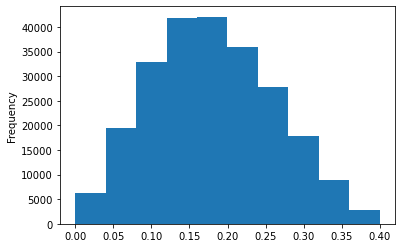

In [39]:
new['dti'].plot(x='dti', kind='hist') 

<AxesSubplot:xlabel='emp_length'>

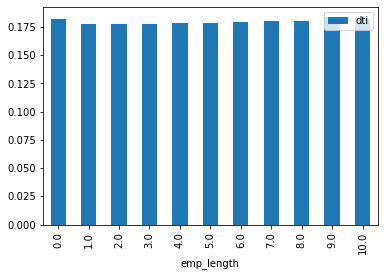

In [40]:
new[['emp_length', 'dti']].groupby('emp_length').mean().reset_index().plot(x='emp_length', y='dti', kind='bar')

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='emp_length', ylabel='dti'>

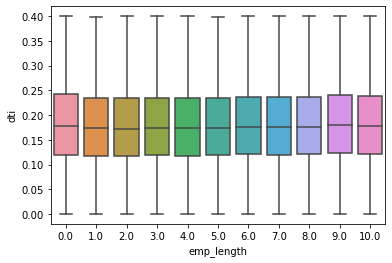

In [42]:
sns.boxplot(x='emp_length', y='dti', data=new)

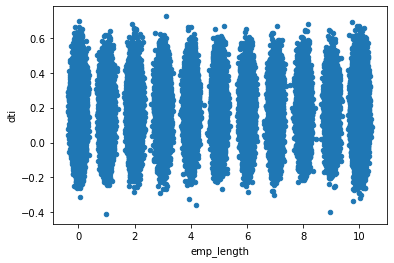

In [43]:
new[['emp_length', 'dti']].apply(lambda x: x + 0.1*np.random.normal(size=x.shape))\
  .plot(x='emp_length', y='dti', kind='scatter');
display()

In [44]:
import numpy as np
import matplotlib.pylab as plt

## Loan Amount

### What is the percent of charged off loans per grade?

In [45]:
# Determining the loans that are bad from loan_status column
# https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics/notebook

bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]


new['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
new['loan_condition'] = new['loan_status'].apply(loan_condition)

<ipython-input-45-6060f5cf16d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['loan_condition'] = np.nan
<ipython-input-45-6060f5cf16d0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['loan_condition'] = new['loan_status'].apply(loan_condition)


<AxesSubplot:ylabel='loan_condition'>

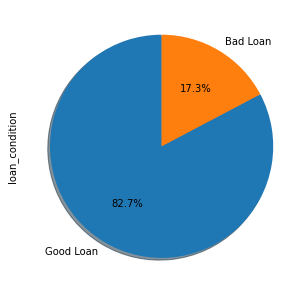

In [46]:

new['loan_condition'].value_counts().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

In [47]:
badloans_df = new.loc[new["loan_condition"] == "Bad Loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['grade'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['grade'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Default,In Grace Period,Late (16-30 days),Late (31-120 days),Total
grade,,,,,,
A,1940,0,5,1,3,1949
B,6651,0,23,18,57,6749
C,11712,0,112,35,152,12011
D,10167,1,163,59,219,10609
E,6165,0,120,26,132,6443
F,2144,1,28,17,38,2228
G,695,0,14,4,9,722


<AxesSubplot:xlabel='grade'>

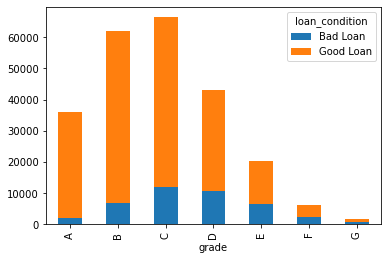

In [48]:
loans_by_grade = new.groupby(['grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='addr_state'>

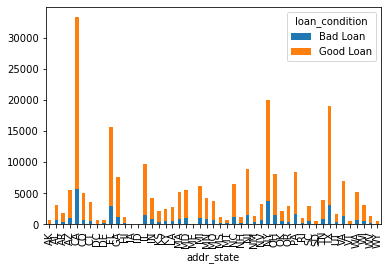

In [49]:
loans_by_grade = new.groupby(['addr_state', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='purpose'>

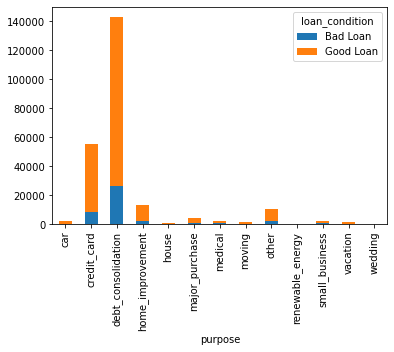

In [50]:
loans_by_grade = new.groupby(['purpose', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Month'>

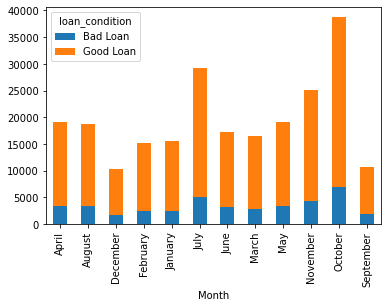

In [51]:
loans_by_grade = new.groupby(['Month', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='emp_length'>

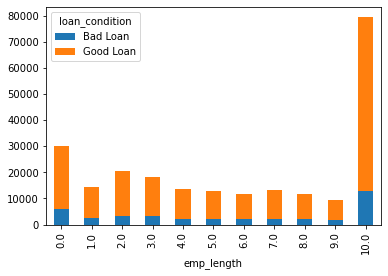

In [52]:
loans_by_grade = new.groupby(['emp_length', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True)

In [53]:
new['loan_type'] = np.where(new["loan_condition"].str.contains("Good Loan"), 1, 0)

<ipython-input-53-75924d5a1496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['loan_type'] = np.where(new["loan_condition"].str.contains("Good Loan"), 1, 0)


In [54]:
new

,loan_amnt,int_rate,term,grade,emp_length,issue_d,Month,loan_status,pymnt_plan,purpose,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,application_type,loan_condition,loan_type
0,15000.0,0.1239,60.0,C,10.0,2014-12-01,December,Fully Paid,n,debt_consolidation,...,0.0,Aug-94,0.0,6.0,138008.0,29%,17.0,Individual,Good Loan,1
1,10400.0,0.0699,36.0,A,8.0,2014-12-01,December,Charged Off,n,credit_card,...,0.0,Sep-89,2.0,17.0,6133.0,31.60%,36.0,Individual,Bad Loan,0
2,12800.0,0.1714,60.0,D,10.0,2014-12-01,December,In Grace Period,n,car,...,1.0,Oct-00,0.0,8.0,5753.0,100.90%,13.0,Individual,Bad Loan,0
3,21425.0,0.1559,60.0,D,6.0,2014-12-01,December,Fully Paid,n,credit_card,...,0.0,Aug-03,0.0,10.0,16374.0,76.20%,35.0,Individual,Good Loan,1
4,9600.0,0.1366,36.0,C,10.0,2014-12-01,December,Fully Paid,n,debt_consolidation,...,0.0,Nov-92,0.0,12.0,16388.0,59.40%,44.0,Individual,Good Loan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235624,18400.0,0.1447,60.0,C,4.0,2014-01-01,January,Fully Paid,n,debt_consolidation,...,0.0,Apr-03,2.0,18.0,23208.0,77.60%,36.0,Individual,Good Loan,1
235625,22000.0,0.1997,60.0,D,10.0,2014-01-01,January,Charged Off,n,debt_consolidation,...,0.0,Jun-97,5.0,18.0,18238.0,46.30%,30.0,Individual,Bad Loan,0
235626,2000.0,0.0790,36.0,A,3.0,2014-01-01,January,Fully Paid,n,credit_card,...,3.0,Feb-03,1.0,21.0,11404.0,21.50%,27.0,Individual,Good Loan,1
235627,20700.0,0.1699,60.0,D,7.0,2014-01-01,January,Fully Paid,n,debt_consolidation,...,0.0,Dec-01,2.0,18.0,6688.0,51.10%,43.0,Individual,Good Loan,1


In [55]:
log = new[['emp_length', 'Month', 'purpose', 'addr_state', 'dti', 'loan_amnt', 'loan_type']]

In [56]:
cat_vars=['addr_state','Month','purpose']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(log[var], prefix=var)
    data1=log.join(cat_list)
    data=data1
cat_vars=['addr_state','Month','purpose']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [57]:
cat_vars=['addr_state','Month','purpose']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(log[var], prefix=var)
    data1=log.join(cat_list)
    data=data1
cat_vars=['addr_state','Month','purpose']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [58]:
data_final=data[to_keep]
data_final.columns.values

array(['emp_length', 'dti', 'loan_amnt', 'loan_type', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding'],
      dtype=object)

In [59]:
data_final

,emp_length,dti,loan_amnt,loan_type,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10.0,0.1203,15000.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,8.0,0.1492,10400.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10.0,0.0831,12800.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,6.0,0.1849,21425.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,10.0,0.2581,9600.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235624,4.0,0.1985,18400.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
235625,10.0,0.1845,22000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
235626,3.0,0.0539,2000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
235627,7.0,0.2565,20700.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
X = data_final.loc[:, data_final.columns != 'loan_type']
Y = data_final.loc[:, data_final.columns == 'loan_type']

In [61]:
import statsmodels.api as sm 
logit_model = sm.Logit(Y, X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.453947
         Iterations: 35


/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.014      
Dependent Variable:         loan_type              AIC:                    213957.9512
Date:                       2021-10-09 15:30       BIC:                    214123.8714
No. Observations:           235629                 Log-Likelihood:         -1.0696e+05
Df Model:                   15                     LL-Null:                -1.0845e+05
Df Residuals:               235613                 LLR p-value:            0.0000     
Converged:                  0.0000                 Scale:                  1.0000     
No. Iterations:             35.0000                                                   
--------------------------------------------------------------------------------------
                            Coef.   Std.Err.     z     P>|z|     [0.025       0.975]  
-------------------------------------------------------------------------------

In [62]:
log2 = new[['dti', 'loan_type', 'emp_length', 'loan_amnt']]

In [63]:
X = log2.loc[:, log2.columns != 'loan_type']
Y = log2.loc[:, log2.columns == 'loan_type']

In [64]:
import statsmodels.api as sm 
logit_model = sm.Logit(Y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.488560
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.061     
Dependent Variable: loan_type        AIC:              230243.7863
Date:               2021-10-09 15:30 BIC:              230274.8964
No. Observations:   235629           Log-Likelihood:   -1.1512e+05
Df Model:           2                LL-Null:          -1.0845e+05
Df Residuals:       235626           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
              Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
dti           2.8754     0.0484   59.4289   0.0000   2.7806   2.9703
emp_length    0.0853     0.0013   67.2858   0

In [65]:
log3 = new[['dti', 'loan_type', 'emp_length', 'loan_amnt']]

In [66]:
import seaborn as sns

<AxesSubplot:>

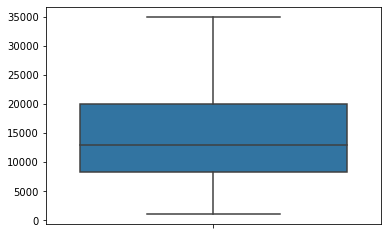

In [67]:
loan_amt = new['loan_amnt'].values
sns.boxplot(y=loan_amt)

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

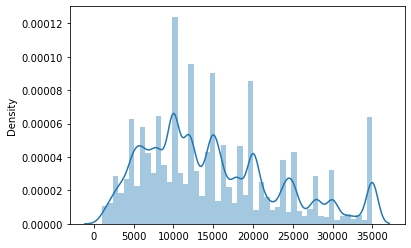

In [68]:
sns.distplot(loan_amt)

 ## Loan Status:

- 2 recorded defaulted loans

- 39474 recorded charged off (could still indicate defaulted loan)

In [69]:
new['loan_status'].unique()

# charged off indicates defaulted loan

array(['Fully Paid', 'Charged Off', 'In Grace Period', 'Current',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [70]:
loan_status_counts = new['loan_status'].value_counts()
loan_status_counts

Fully Paid            173355
Charged Off            39474
Current                21563
Late (31-120 days)       610
In Grace Period          465
Late (16-30 days)        160
Default                    2
Name: loan_status, dtype: int64

Loan Statuses Counts


/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


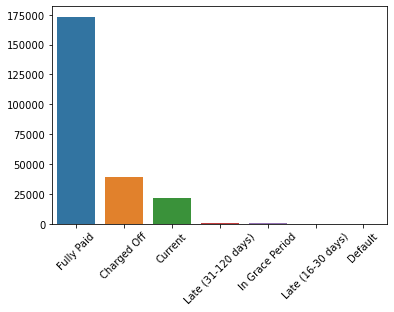

In [71]:
ax = sns.barplot(loan_status_counts.index, loan_status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")

## Purpose 

- most approved loans are for debt consolidation and credit cards

- debt consolidation is common for student loans

- significant amount of approved loans listed as"other"

In [72]:
new['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'car', 'home_improvement',
       'house', 'medical', 'other', 'moving', 'major_purchase',
       'vacation', 'small_business', 'renewable_energy', 'wedding'],
      dtype=object)

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Purpose Counts


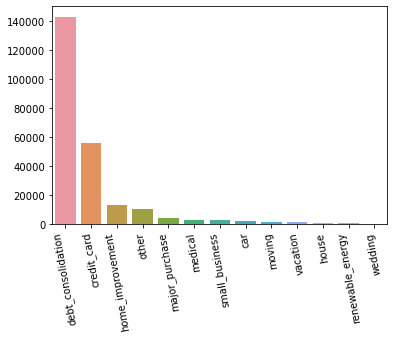

In [73]:
purpose_counts = new['purpose'].value_counts()
px = sns.barplot(purpose_counts.index, purpose_counts.values)
px.set_xticklabels(px.get_xticklabels(),rotation=100)
print("Purpose Counts")

## Grade

In [74]:
grade_counts = new['grade'].value_counts()
grade_counts

C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Grade Counts


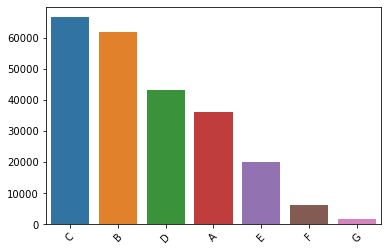

In [75]:
ax = sns.barplot(grade_counts.index, grade_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Grade Counts")

In [76]:
new['addr_state'].unique()

array(['VA', 'CA', 'MO', 'NJ', 'AZ', 'MN', 'NY', 'IL', 'FL', 'MD', 'MI',
       'WA', 'KY', 'TX', 'GA', 'IN', 'CO', 'LA', 'NC', 'AL', 'CT', 'MS',
       'KS', 'AR', 'PA', 'UT', 'OH', 'HI', 'NM', 'NH', 'TN', 'WV', 'MA',
       'SD', 'OK', 'SC', 'AK', 'OR', 'NV', 'VT', 'DC', 'RI', 'WI', 'MT',
       'WY', 'DE', 'IA', 'ME', 'ID'], dtype=object)

In [77]:
new['addr_state'].value_counts()

CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
ID        1
ME        1
IA        1
Name: addr_state, dtype: int64

In [78]:
# unique values in each
for col in df:
  print(df[col].unique())

[15000. 10400. 12800. ...  1225. 30650. 32325.]
[15000. 10400. 12800. ...  1225. 30650. 32325.]
[15000. 10400. 12800. ... 33375.  1225.   950.]
[60. 36.]
[0.1239 0.0699 0.1714 0.1559 0.1366 0.1199 0.2199 0.1786 0.1144 0.1431
 0.1049 0.1599 0.1499 0.1999 0.1299 0.0949 0.2099 0.0749 0.1649 0.0867
 0.0819 0.2299 0.1854 0.1924 0.2583 0.258  0.245  0.0649 0.0603 0.2399
 0.2589 0.2499 0.06   0.2557 0.2599 0.2606 0.1449 0.1398 0.1249 0.0839
 0.1757 0.2343 0.1629 0.1015 0.1561 0.1824 0.0917 0.0769 0.1699 0.1099
 0.1899 0.1335 0.202  0.1952 0.1167 0.2215 0.0712 0.2408 0.175  0.2118
 0.1365 0.0967 0.1531 0.1464 0.089  0.0662 0.1416 0.1825 0.1659 0.1947
 0.079  0.2049 0.1892 0.2245 0.0762 0.237  0.1624 0.1498 0.1997 0.1922
 0.1285 0.1447 0.1353 0.2148 0.205  0.229  0.234  0.224  0.192 ]
[336.64 321.08 319.08 ... 548.05 372.77 217.65]
['C' 'A' 'D' 'B' 'E' 'F' 'G']
['C1' 'A3' 'D4' 'D1' 'C3' 'B5' 'E5' 'D5' 'B4' 'C4' 'B3' 'D2' 'C5' 'E3'
 'C2' 'B2' 'E4' 'A4' 'D3' 'B1' 'A5' 'F1' 'E1' 'E2' 'G2' 'G1' 'F3

In [79]:
# number of unique values in each column

nunique = df.nunique()
print('number of unique values is:', nunique)

number of unique values is: loan_amnt                           1309
funded_amnt                         1309
funded_amnt_inv                     1357
term                                   2
int_rate                              89
installment                        33419
grade                                  7
sub_grade                             35
emp_title                          75352
emp_length                            11
home_ownership                         4
annual_inc                         18248
verification_status                    3
issue_d                               12
loan_status                            7
pymnt_plan                             2
desc                               14843
purpose                               13
title                               2057
zip_code                             866
addr_state                            49
dti                                 3995
delinq_2yrs                           22
earliest_cr_line             

In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,235619,235620,235621,235622,235623,235624,235625,235626,235627,235628
loan_amnt,15000,10400,12800,21425,9600,7650,2500,17000,21075,12975,...,8525,6000,18000,15000,10000,18400,22000,2000,20700,10000
funded_amnt,15000,10400,12800,21425,9600,7650,2500,17000,21075,12975,...,8525,6000,18000,15000,10000,18400,22000,2000,20700,10000
funded_amnt_inv,15000,10400,12800,21425,9600,7650,2500,17000,21075,12975,...,8525,6000,17975,15000,10000,18400,22000,2000,20700,9975
term,60,36,60,60,36,36,36,36,60,36,...,60,36,36,36,36,60,60,36,60,36
int_rate,0.1239,0.0699,0.1714,0.1559,0.1366,0.1366,0.1199,0.1366,0.2199,0.1786,...,0.1825,0.1561,0.079,0.1353,0.1825,0.1447,0.1997,0.079,0.1699,0.192
installment,336.64,321.08,319.08,516.36,326.53,260.2,83.03,578.22,581.95,468.17,...,217.65,209.79,563.23,509.25,362.78,432.64,582.5,62.59,514.34,367.58
grade,C,A,D,D,C,C,B,C,E,D,...,D,C,A,B,D,C,D,A,D,D
sub_grade,C1,A3,D4,D1,C3,C3,B5,C3,E5,D5,...,D3,C4,A4,B5,D3,C2,D5,A4,D1,D3
emp_title,MANAGEMENT,Truck Driver Delivery Personel,Senior Sales Professional,Programming Analysis Supervisor,Admin Specialist,Technical Specialist,Manufacturing Engineer,Deputy sheriff,Paralegal,Sales,...,MANAGER,manager,sales rep,Director of Operations,MecÃƒÂ¡nica,Financial Advisor,Chief of Interpretation (Park Ranger),Server Engineer Lead,patrol,NaN
emp_length,10,8,10,6,10,0,0,10,10,10,...,5,7,3,4,10,4,10,3,7,10


In [81]:
new.describe()

,loan_amnt,int_rate,term,emp_length,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,total_acc,loan_type
count,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000,2.356290e+05,235629.000000,235629.000000
mean,14870.156793,0.137696,43.441427,5.801680,0.180408,0.344512,0.755760,11.668093,1.650809e+04,26.010826,0.827224
std,8438.318193,0.043261,11.100448,3.805519,0.080230,0.898319,1.033981,5.268175,2.146289e+04,11.895675,0.378054
min,1000.000000,0.060000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000
25%,8325.000000,0.109900,36.000000,2.000000,0.120200,0.000000,0.000000,8.000000,6.336000e+03,17.000000,1.000000
50%,13000.000000,0.136500,36.000000,6.000000,0.176300,0.000000,0.000000,11.000000,1.168600e+04,24.000000,1.000000
75%,20000.000000,0.162900,60.000000,10.000000,0.237600,0.000000,1.000000,14.000000,2.052800e+04,33.000000,1.000000
max,35000.000000,0.260600,60.000000,10.000000,0.399900,22.000000,6.000000,84.000000,2.560703e+06,156.000000,1.000000


#### Visualizations

-  looking for worthiness of prospective borrower
- loan amount, purpose of the loan, dti, residence state, (common attributes in both files)
- is there a level above dti where every loan is rejected 
- correlation between purpose of loan and amount due (leisure activities vs. challenging circumstances)
- geocode loan amount by state/zip

In [82]:
import seaborn as sns

<AxesSubplot:>

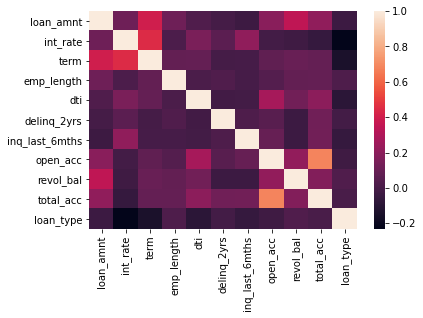

In [83]:
sns.heatmap(new.corr())

## Rejected Loans

Combine the approved and rejected data for a given year, assign a class to each record

In [84]:
rejected = pd.read_csv("Desktop/ACC 652/Week 5/RejectStatsA(1).csv", skiprows=1)

In [85]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,5/26/07,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,5/26/07,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,5/27/07,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,5/27/07,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,5/27/07,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0


In [86]:
rejected.tail()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
755486,35000.0,12/31/12,other,651.0,20.29%,342xx,FL,< 1 year,0
755487,3000.0,12/31/12,other,577.0,6.75%,021xx,MA,< 1 year,0
755488,10000.0,12/31/12,debt_consolidation,656.0,20.03%,828xx,WY,< 1 year,0
755489,25000.0,12/31/12,debt_consolidation,704.0,44.59%,336xx,FL,< 1 year,0
755490,35000.0,12/31/12,other,597.0,4.13%,211xx,MD,< 1 year,0


In [87]:
rejected.isnull().sum()

Amount Requested            0
Application Date            0
Loan Title                 14
Risk_Score              23929
Debt-To-Income Ratio        0
Zip Code                   22
State                      21
Employment Length        8130
Policy Code                 0
dtype: int64

In [88]:
rejected['Amount Requested']

0          1000.0
1          1000.0
2         11000.0
3          6000.0
4          1500.0
           ...   
755486    35000.0
755487     3000.0
755488    10000.0
755489    25000.0
755490    35000.0
Name: Amount Requested, Length: 755491, dtype: float64

In [89]:
rejected['State'].value_counts()

CA    99792
TX    62049
NY    60718
FL    60051
PA    33167
IL    31488
GA    29000
OH    28510
NJ    27666
VA    23556
MI    20696
NC    20387
MA    18808
MD    17856
AZ    16281
MO    14605
WA    14007
CO    13335
AL    13185
SC    12146
CT    12137
LA    11181
WI    10664
MN    10400
KY    10286
NV     9513
AR     9400
OK     8165
OR     7198
KS     6336
UT     5126
WV     4975
HI     4341
NM     4329
NH     4038
RI     3638
DE     2708
MT     2102
AK     2005
DC     1900
VT     1829
SD     1620
WY     1608
IN     1134
MS      551
TN      449
NE      175
IA      144
ME      108
ID       69
ND       38
Name: State, dtype: int64

In [90]:
# plot income level data on map (plotly or tableau)
# merge accepted loans and rejected loans data by state/zip codes
# include: loan rejected loan amount, accepted loan amount 

#### 1. Standardize date values - extract 2012 and month 

In [91]:
rejected

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,5/26/07,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0
1,1000.0,5/26/07,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0
2,11000.0,5/27/07,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0
3,6000.0,5/27/07,waksman,698.0,38.64%,017xx,MA,< 1 year,0
4,1500.0,5/27/07,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0
...,...,...,...,...,...,...,...,...,...
755486,35000.0,12/31/12,other,651.0,20.29%,342xx,FL,< 1 year,0
755487,3000.0,12/31/12,other,577.0,6.75%,021xx,MA,< 1 year,0
755488,10000.0,12/31/12,debt_consolidation,656.0,20.03%,828xx,WY,< 1 year,0
755489,25000.0,12/31/12,debt_consolidation,704.0,44.59%,336xx,FL,< 1 year,0


In [92]:
rejected['Application Date'].unique()

array(['5/26/07', '5/27/07', '5/28/07', ..., '12/29/12', '12/30/12',
       '12/31/12'], dtype=object)

In [93]:
# narrow to 2012
import datetime as dt
rejected['Application Date'] = pd.to_datetime(rejected['Application Date'])

rejected12 = rejected[rejected['Application Date'].dt.year == 2012]
len(rejected12)

337277

In [94]:
rejected12.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
418214,10000.0,2012-01-01,debt_consolidation,0.0,0%,729xx,AR,< 1 year,0
418215,35000.0,2012-01-01,debt_consolidation,614.0,18%,554xx,MN,< 1 year,0
418216,2500.0,2012-01-01,other,579.0,53.92%,287xx,NC,< 1 year,0
418217,10000.0,2012-01-01,debt_consolidation,652.0,5.74%,729xx,AR,< 1 year,0
418218,10000.0,2012-01-01,debt_consolidation,NaN,-1%,729xx,AR,< 1 year,0


In [95]:
# extract month
rejected12['Month'] = rejected12['Application Date'].dt.strftime('%B')
rejected12['Month'].unique()

<ipython-input-95-88e8a346b8b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Month'] = rejected12['Application Date'].dt.strftime('%B')


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

#### 2. Convert DTI percentage to decimal

In [96]:
rejected12['Debt-To-Income Ratio'] = rejected['Debt-To-Income Ratio'].str.rstrip('%').astype('float') / 100.0

<ipython-input-96-a9ec3e220e5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Debt-To-Income Ratio'] = rejected['Debt-To-Income Ratio'].str.rstrip('%').astype('float') / 100.0


In [97]:
rejected12['Debt-To-Income Ratio'].head()

418214    0.0000
418215    0.1800
418216    0.5392
418217    0.0574
418218   -0.0100
Name: Debt-To-Income Ratio, dtype: float64

#### 3. Remove "<", "+", "year", "years" from emp_length and add specified values

In [98]:
rejected12['Employment Length'].unique()

array(['< 1 year', '1 year', '10+ years', '3 years', '8 years', '4 years',
       nan, '2 years', '9 years', '6 years', '7 years', '5 years'],
      dtype=object)

In [99]:
rejected12['Employment Length'] = rejected12['Employment Length'].str.rstrip('years')
rejected12['Employment Length'] = rejected12['Employment Length'].str.rstrip('year')

<ipython-input-99-e84a777aaef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Employment Length'] = rejected12['Employment Length'].str.rstrip('years')
<ipython-input-99-e84a777aaef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Employment Length'] = rejected12['Employment Length'].str.rstrip('year')


In [100]:
rejected12['Employment Length'] = rejected12['Employment Length'].replace('10+ ', 10)

<ipython-input-100-9c9c536c41b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Employment Length'] = rejected12['Employment Length'].replace('10+ ', 10)


In [101]:
rejected12['Employment Length'] = rejected12['Employment Length'].replace('9 ', 9)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('8 ', 8)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('7 ', 7)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('6 ', 6)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('5 ', 5)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('4 ', 4)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('3 ', 3)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('2 ', 2)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('1 ', 1)
rejected12['Employment Length'] = rejected12['Employment Length'].replace('< 1 ', 0)

<ipython-input-101-fd83423cc520>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Employment Length'] = rejected12['Employment Length'].replace('9 ', 9)
<ipython-input-101-fd83423cc520>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rejected12['Employment Length'] = rejected12['Employment Length'].replace('8 ', 8)
<ipython-input-101-fd83423cc520>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [102]:
len(new['zip_code'])

235629

In [103]:
len(rejected['Zip Code'])

755491

# Merge Rejected Loans and Accepted Loans 

1. dataframe of each that includes only common attributes

2. merge dataframes, add column class that identifies rejected/accepted 

3. export merged dataframe as Excel file 

Confusion: 

- join/merge in python, excel or tableau
*SPARK*

- map features in python vs. in tableau 
*not enough data to map income*

- doing everything over in Excel, R
*Spark in python is best for big data*

Notes on Python and Accounting Data:

- useless if you do not know the functions 
- good for granular details on each column (value counts, unique values, missing values)
- good for editing data values in a column 
- Tableau is easier for visualization purposes
- Dataframes are better to merge than excel sheets and not as hard


In [104]:
rej = rejected12[['Amount Requested', 'Month', 'Loan Title', 'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length']]
rej.head()

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length
418214,10000.0,January,debt_consolidation,0.0000,729xx,AR,0.0
418215,35000.0,January,debt_consolidation,0.1800,554xx,MN,0.0
418216,2500.0,January,other,0.5392,287xx,NC,0.0
418217,10000.0,January,debt_consolidation,0.0574,729xx,AR,0.0
418218,10000.0,January,debt_consolidation,-0.0100,729xx,AR,0.0


In [105]:
acc = new[['loan_amnt', 'Month', 'purpose', 'dti', 'zip_code', 'addr_state', 'emp_length' ]]
acc.head()

,loan_amnt,Month,purpose,dti,zip_code,addr_state,emp_length
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0
2,12800.0,December,car,0.0831,953xx,CA,10.0
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0


In [106]:
len(rej)

337277

In [107]:
len(acc)

235629

In [108]:
acc['loan_amnt'] = acc['loan_amnt'].astype(float)

<ipython-input-108-a567eea2e83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['loan_amnt'] = acc['loan_amnt'].astype(float)


In [109]:
rej.shape

(337277, 7)

In [110]:
acc.shape

(235629, 7)

In [111]:
acc.isnull().sum()

loan_amnt     0
Month         0
purpose       0
dti           0
zip_code      0
addr_state    0
emp_length    0
dtype: int64

In [112]:
rej.isnull().sum()

Amount Requested           0
Month                      0
Loan Title                 2
Debt-To-Income Ratio       0
Zip Code                   1
State                      0
Employment Length       3584
dtype: int64

In [113]:
rej['Employment Length'].value_counts()

0.0     292868
10.0     10561
2.0       5148
1.0       4481
3.0       4107
5.0       3970
4.0       3479
6.0       3234
7.0       2398
8.0       2062
9.0       1385
Name: Employment Length, dtype: int64

In [114]:
rej.dropna(axis=0, how='any', inplace=True)

<ipython-input-114-72c6d86c209d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rej.dropna(axis=0, how='any', inplace=True)


In [115]:
rej.shape

(333690, 7)

In [116]:
#rej.to_csv("rejected.csv")

In [117]:
rej

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length
418214,10000.0,January,debt_consolidation,0.0000,729xx,AR,0.0
418215,35000.0,January,debt_consolidation,0.1800,554xx,MN,0.0
418216,2500.0,January,other,0.5392,287xx,NC,0.0
418217,10000.0,January,debt_consolidation,0.0574,729xx,AR,0.0
418218,10000.0,January,debt_consolidation,-0.0100,729xx,AR,0.0
...,...,...,...,...,...,...,...
755486,35000.0,December,other,0.2029,342xx,FL,0.0
755487,3000.0,December,other,0.0675,021xx,MA,0.0
755488,10000.0,December,debt_consolidation,0.2003,828xx,WY,0.0
755489,25000.0,December,debt_consolidation,0.4459,336xx,FL,0.0


In [118]:
acc

,loan_amnt,Month,purpose,dti,zip_code,addr_state,emp_length
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0
2,12800.0,December,car,0.0831,953xx,CA,10.0
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0
...,...,...,...,...,...,...,...
235624,18400.0,January,debt_consolidation,0.1985,773xx,TX,4.0
235625,22000.0,January,debt_consolidation,0.1845,377xx,TN,10.0
235626,2000.0,January,credit_card,0.0539,913xx,CA,3.0
235627,20700.0,January,debt_consolidation,0.2565,458xx,OH,7.0


1. Add column to each dataframe (rejected/accepted)

2. full join on indexes

3. add column that identifies rejected/accepted per row

In [119]:
acc['class'] = 'accepted'

<ipython-input-119-f6cb51cf0b73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['class'] = 'accepted'


In [120]:
rej['class'] = 'rejected'

<ipython-input-120-eda72fa38989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rej['class'] = 'rejected'


In [121]:
rej.head()

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
418214,10000.0,January,debt_consolidation,0.0000,729xx,AR,0.0,rejected
418215,35000.0,January,debt_consolidation,0.1800,554xx,MN,0.0,rejected
418216,2500.0,January,other,0.5392,287xx,NC,0.0,rejected
418217,10000.0,January,debt_consolidation,0.0574,729xx,AR,0.0,rejected
418218,10000.0,January,debt_consolidation,-0.0100,729xx,AR,0.0,rejected


In [122]:
#rej.drop(['head'], axis= 1, inplace=True)

In [123]:
rej.head()

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
418214,10000.0,January,debt_consolidation,0.0000,729xx,AR,0.0,rejected
418215,35000.0,January,debt_consolidation,0.1800,554xx,MN,0.0,rejected
418216,2500.0,January,other,0.5392,287xx,NC,0.0,rejected
418217,10000.0,January,debt_consolidation,0.0574,729xx,AR,0.0,rejected
418218,10000.0,January,debt_consolidation,-0.0100,729xx,AR,0.0,rejected


In [124]:
acc = acc.reset_index()

In [125]:
rej = rej.reset_index()

In [126]:
acc.drop(['index'], axis= 1, inplace=True)

In [127]:
rej.drop(['index'], axis= 1, inplace=True)

In [128]:
rej.head()

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
0,10000.0,January,debt_consolidation,0.0000,729xx,AR,0.0,rejected
1,35000.0,January,debt_consolidation,0.1800,554xx,MN,0.0,rejected
2,2500.0,January,other,0.5392,287xx,NC,0.0,rejected
3,10000.0,January,debt_consolidation,0.0574,729xx,AR,0.0,rejected
4,10000.0,January,debt_consolidation,-0.0100,729xx,AR,0.0,rejected


In [129]:
acc.head()

,loan_amnt,Month,purpose,dti,zip_code,addr_state,emp_length,class
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0,accepted
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0,accepted
2,12800.0,December,car,0.0831,953xx,CA,10.0,accepted
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0,accepted
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0,accepted


In [130]:
rej.T

,0,1,2,3,4,5,6,7,8,9,...,333680,333681,333682,333683,333684,333685,333686,333687,333688,333689
Amount Requested,10000,35000,2500,10000,10000,1000,2000,2500,10000,5000,...,15850,5000,35000,1000,10000,35000,3000,10000,25000,35000
Month,January,January,January,January,January,January,January,January,January,January,...,December,December,December,December,December,December,December,December,December,December
Loan Title,debt_consolidation,debt_consolidation,other,debt_consolidation,debt_consolidation,debt_consolidation,other,vacation,medical,moving,...,Debt Consolidation,major_purchase,payoff,renewable_energy,Home improvement,other,other,debt_consolidation,debt_consolidation,other
Debt-To-Income Ratio,0,0.18,0.5392,0.0574,-0.01,0.1301,0.3981,0.008,0.0447,0.1178,...,0.0893,0,0.1283,0,0.0671,0.2029,0.0675,0.2003,0.4459,0.0413
Zip Code,729xx,554xx,287xx,729xx,729xx,852xx,951xx,895xx,120xx,781xx,...,300xx,841xx,981xx,276xx,952xx,342xx,021xx,828xx,336xx,211xx
State,AR,MN,NC,AR,AR,AZ,CA,NV,NY,TX,...,GA,UT,WA,NC,CA,FL,MA,WY,FL,MD
Employment Length,0,0,0,0,0,0,0,0,0,0,...,10,0,10,0,6,0,0,0,0,0
class,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected,...,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected,rejected


In [131]:
acc = acc.rename(columns={"loan_amnt": "Amount Requested", "purpose": "Loan Title", "dti":"Debt-To-Income Ratio", "zip_code": "Zip Code", "addr_state": "State", "emp_length": "Employment Length" })

In [132]:
acc.head()

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0,accepted
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0,accepted
2,12800.0,December,car,0.0831,953xx,CA,10.0,accepted
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0,accepted
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0,accepted


In [133]:
#both = pd.merge(acc, rej, how="outer", on="Month")

In [134]:
#both.head()

#### Merging the dataframes with Spark

In [135]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

In [136]:
# context config/setup 
sc = SparkContext(conf=SparkConf().setMaster('local[8]'))
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [137]:
# copy pandas df's into spark df's
t1 = spark.createDataFrame(acc)
t2 = spark.createDataFrame(rej)

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:289: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [138]:
t1

DataFrame[Amount Requested: double, Month: string, Loan Title: string, Debt-To-Income Ratio: double, Zip Code: string, State: string, Employment Length: double, class: string]

In [139]:
t2

DataFrame[Amount Requested: double, Month: string, Loan Title: string, Debt-To-Income Ratio: double, Zip Code: string, State: string, Employment Length: double, class: string]

In [140]:
from pyspark.sql import Row

In [141]:
both = t1.union(t2)
both.show()

+----------------+--------+------------------+--------------------+--------+-----+-----------------+--------+
|Amount Requested|   Month|        Loan Title|Debt-To-Income Ratio|Zip Code|State|Employment Length|   class|
+----------------+--------+------------------+--------------------+--------+-----+-----------------+--------+
|         15000.0|December|debt_consolidation| 0.12029999999999999|   235xx|   VA|             10.0|accepted|
|         10400.0|December|       credit_card|              0.1492|   937xx|   CA|              8.0|accepted|
|         12800.0|December|               car| 0.08310000000000001|   953xx|   CA|             10.0|accepted|
|         21425.0|December|       credit_card| 0.18489999999999998|   658xx|   MO|              6.0|accepted|
|          9600.0|December|debt_consolidation|              0.2581|   077xx|   NJ|             10.0|accepted|
|          7650.0|December|debt_consolidation|              0.3481|   850xx|   AZ|              0.0|accepted|
|         

In [142]:
display(both)

DataFrame[Amount Requested: double, Month: string, Loan Title: string, Debt-To-Income Ratio: double, Zip Code: string, State: string, Employment Length: double, class: string]

In [143]:
both.limit(100).toPandas()

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0,accepted
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0,accepted
2,12800.0,December,car,0.0831,953xx,CA,10.0,accepted
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0,accepted
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0,accepted
5,7650.0,December,debt_consolidation,0.3481,850xx,AZ,0.0,accepted
6,2500.0,December,home_improvement,0.1377,554xx,MN,0.0,accepted
7,17000.0,December,debt_consolidation,0.2363,144xx,NY,10.0,accepted
8,21075.0,December,debt_consolidation,0.2950,606xx,IL,10.0,accepted
9,12975.0,December,house,0.2242,331xx,FL,10.0,accepted


In [144]:
both[both['class'] == "rejected"].show()

+----------------+-------+------------------+--------------------+--------+-----+-----------------+--------+
|Amount Requested|  Month|        Loan Title|Debt-To-Income Ratio|Zip Code|State|Employment Length|   class|
+----------------+-------+------------------+--------------------+--------+-----+-----------------+--------+
|         10000.0|January|debt_consolidation|                 0.0|   729xx|   AR|              0.0|rejected|
|         35000.0|January|debt_consolidation|                0.18|   554xx|   MN|              0.0|rejected|
|          2500.0|January|             other|              0.5392|   287xx|   NC|              0.0|rejected|
|         10000.0|January|debt_consolidation|              0.0574|   729xx|   AR|              0.0|rejected|
|         10000.0|January|debt_consolidation|               -0.01|   729xx|   AR|              0.0|rejected|
|          1000.0|January|debt_consolidation|              0.1301|   852xx|   AZ|              0.0|rejected|
|          2000.0|J

In [145]:
combined_data = both.toPandas()

/Users/courtneyhrdy/opt/anaconda3/lib/python3.8/site-packages/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [146]:
combined_data.to_csv('combined.csv')

In [147]:
combined_data.to_excel('combined.xlsx')

In [148]:
combined_data

,Amount Requested,Month,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length,class
0,15000.0,December,debt_consolidation,0.1203,235xx,VA,10.0,accepted
1,10400.0,December,credit_card,0.1492,937xx,CA,8.0,accepted
2,12800.0,December,car,0.0831,953xx,CA,10.0,accepted
3,21425.0,December,credit_card,0.1849,658xx,MO,6.0,accepted
4,9600.0,December,debt_consolidation,0.2581,077xx,NJ,10.0,accepted
...,...,...,...,...,...,...,...,...
569314,35000.0,December,other,0.2029,342xx,FL,0.0,rejected
569315,3000.0,December,other,0.0675,021xx,MA,0.0,rejected
569316,10000.0,December,debt_consolidation,0.2003,828xx,WY,0.0,rejected
569317,25000.0,December,debt_consolidation,0.4459,336xx,FL,0.0,rejected


In [149]:
from pyspark.sql import functions as fn

In [150]:
both.where((fn.col('Debt-To-Income Ratio') > .30000) & \
                  (fn.col('class') == 'rejected')).\
         show()

+----------------+-------+------------------+--------------------+--------+-----+-----------------+--------+
|Amount Requested|  Month|        Loan Title|Debt-To-Income Ratio|Zip Code|State|Employment Length|   class|
+----------------+-------+------------------+--------------------+--------+-----+-----------------+--------+
|          2500.0|January|             other|              0.5392|   287xx|   NC|              0.0|rejected|
|          2000.0|January|             other|              0.3981|   951xx|   CA|              0.0|rejected|
|         25000.0|January|debt_consolidation|              0.4675|   782xx|   TX|              0.0|rejected|
|         30000.0|January|             house|                0.43|   481xx|   MI|              0.0|rejected|
|          2000.0|January|  renewable_energy|              0.6903|   745xx|   OK|              0.0|rejected|
|         25000.0|January|    small_business| 0.33549999999999996|   207xx|   MD|              0.0|rejected|
|          3000.0|J

In [151]:
both.filter(both['Debt-To-Income Ratio'] > .30000).show()

+----------------+--------+------------------+--------------------+--------+-----+-----------------+--------+
|Amount Requested|   Month|        Loan Title|Debt-To-Income Ratio|Zip Code|State|Employment Length|   class|
+----------------+--------+------------------+--------------------+--------+-----+-----------------+--------+
|          7650.0|December|debt_consolidation|              0.3481|   850xx|   AZ|              0.0|accepted|
|         14000.0|December|       credit_card|              0.3568|   754xx|   TX|             10.0|accepted|
|          4000.0|December|debt_consolidation| 0.33990000000000004|   114xx|   NY|              9.0|accepted|
|         11000.0|December|debt_consolidation|               0.341|   395xx|   MS|             10.0|accepted|
|         24000.0|December|debt_consolidation|              0.3362|   117xx|   NY|              8.0|accepted|
|         27525.0|December|debt_consolidation|              0.3114|   333xx|   FL|              5.0|accepted|
|         

In [152]:
both.groupby("class").count().show()

+--------+------+
|   class| count|
+--------+------+
|rejected|333690|
|accepted|235629|
+--------+------+



# Analysis

In [153]:
from pyspark.ml.feature import VectorAssembler

In [155]:
both = both.withColumnRenamed('class', 'label')

In [156]:
training_df, validation_df, testing_df = both.randomSplit([0.6, 0.3, 0.1])

In [157]:
# build a pipeline for analysis
va = VectorAssembler().setInputCols(training_df.columns[2:]).setOutputCol('features')

In [158]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

In [159]:
from pyspark.ml import Pipeline

In [160]:
lr = LogisticRegression(regParam=0.1)